In [ ]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


# lodaing data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [2]:
import seaborn as sns

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


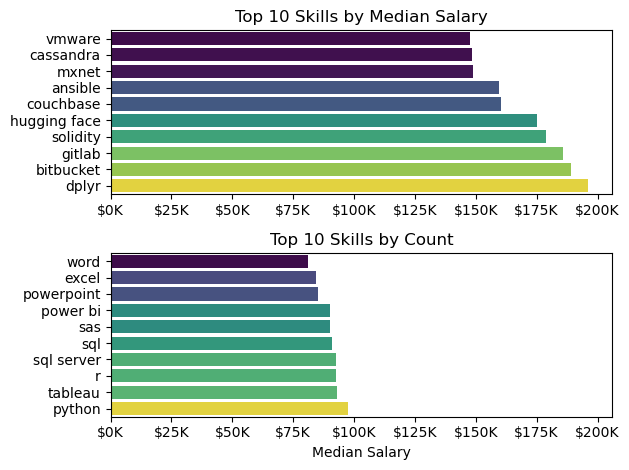

In [12]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2, 1)

sns.barplot(data=df_DA_top_pay, y=df_DA_top_pay.index, x='median', ax=ax[0])

# df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)

sns.barplot(data=df_DA_top_pay, y=df_DA_top_pay.index, x='median', ax=ax[0], hue='median', palette='viridis')
ax[0].legend().remove()
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Skills by Median Salary')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_skills, y=df_DA_skills.index, x='median', ax=ax[1], hue='median', palette='viridis')
ax[1].legend().remove()
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Skills by Count')
ax[1].set_xlabel('Median Salary')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


fig.tight_layout()
plt.show()



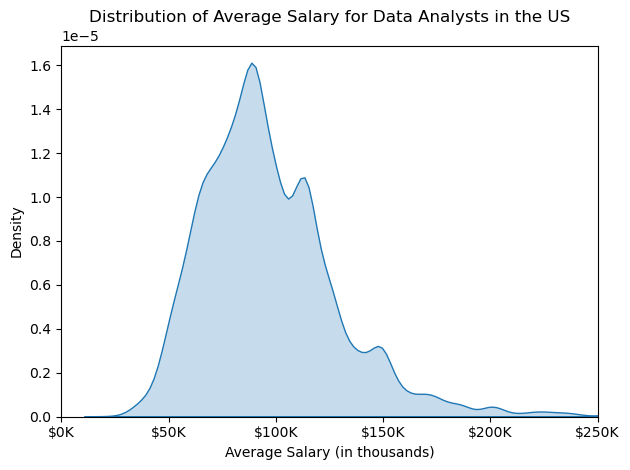

In [23]:
sns.kdeplot(df_DA_US['salary_year_avg'], fill=True)

plt.xlim(0, 250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of Average Salary for Data Analysts in the US')
plt.xlabel('Average Salary (in thousands)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


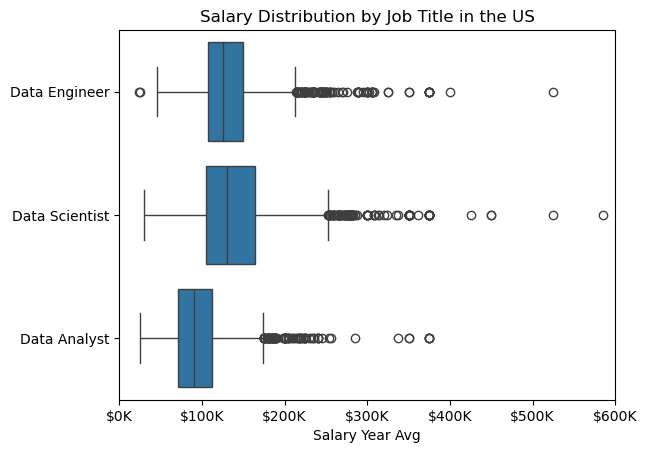

In [28]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short', orient='h')


plt.title('Salary Distribution by Job Title in the US')
plt.xlabel('Salary Year Avg')
plt.ylabel('')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlim(0, 600000)
plt.show()